Total Pokémon: 800
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SN           800 non-null    int64 
 1   Name         800 non-null    object
 2   Type 1       800 non-null    object
 3   Type 2       414 non-null    object
 4   HP           800 non-null    int64 
 5   Attack       800 non-null    int64 
 6   Defense      800 non-null    int64 
 7   Sp. Attack   800 non-null    int64 
 8   Sp. Defense  800 non-null    int64 
 9   Speed        800 non-null    int64 
 10  Generation   800 non-null    int64 
 11  Legendary    800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB
None
                SN       Name Type 1  Type 2          HP      Attack  \
count   800.000000        800    800     414  800.000000  800.000000   
unique         NaN        800     18      18         NaN         NaN   
top            NaN  B

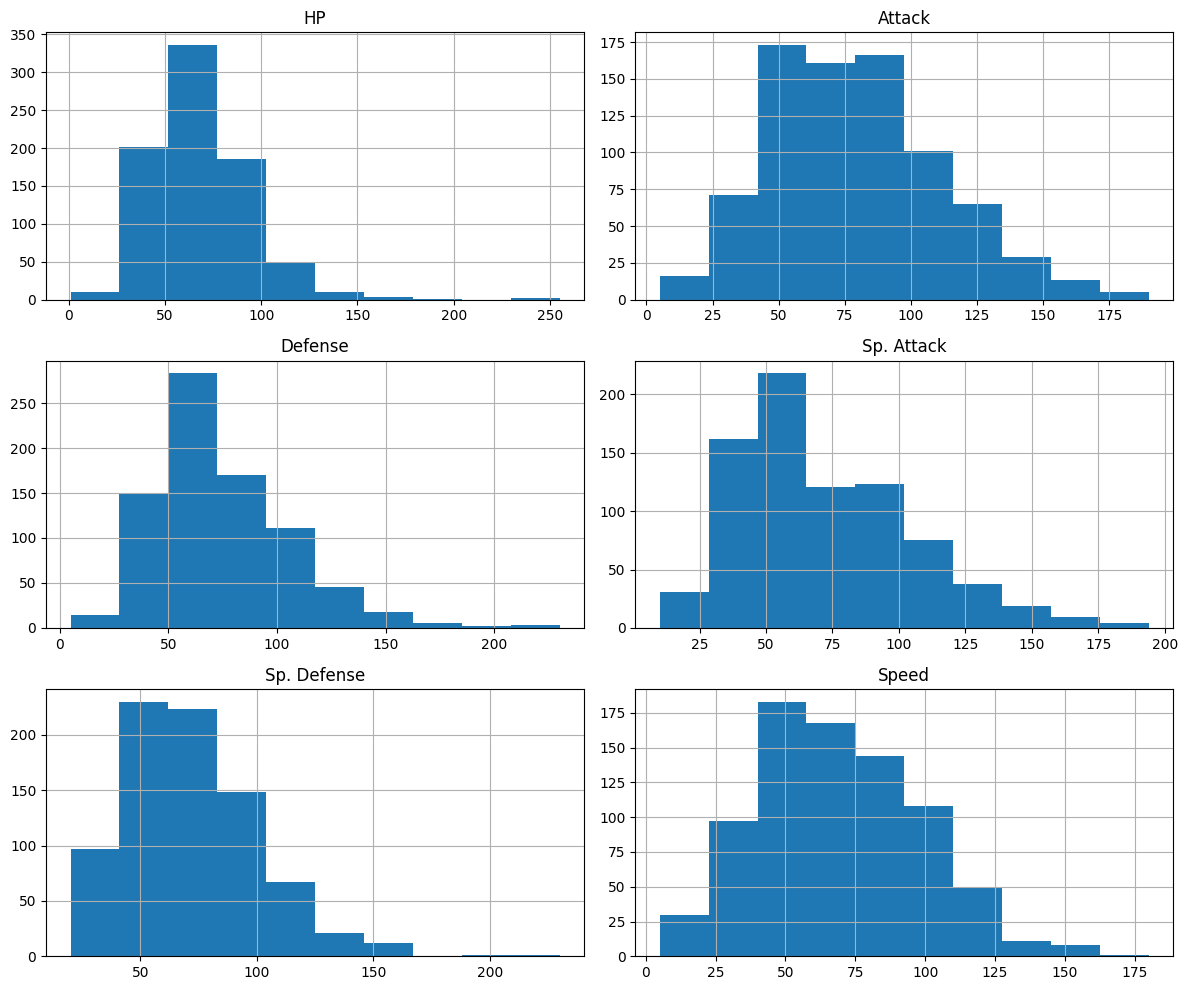

Type 1 counts:
Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64
Legendary counts:
Legendary
False    735
True      65
Name: count, dtype: int64


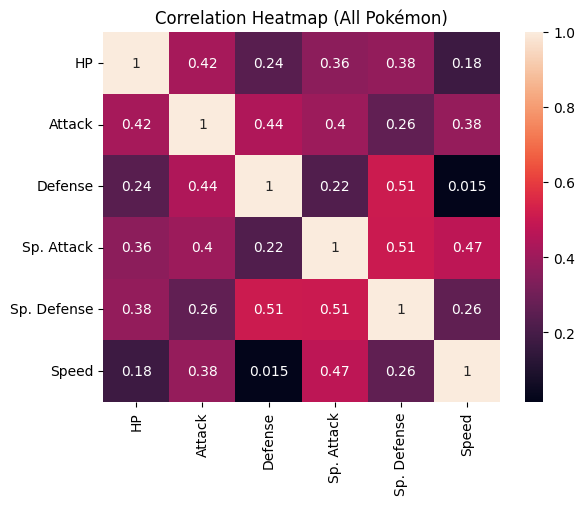

In [29]:
# Exploratory Data Analysis (EDA) including every Pokémon in the CSV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Pokemon.csv')

# Show info for all Pokémon
print("Total Pokémon:", len(df))
print(df.info())
print(df.describe(include='all'))
print(df.head())
print(df.tail())  # Show last few Pokémon for completeness

# Missing values
print("Missing values per column:")
print(df.isnull().sum())

# Distribution of all numerical features
numerical_features = ['HP', 'Attack', 'Defense', 'Sp. Attack', 'Sp. Defense', 'Speed']
df[numerical_features].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Categorical feature counts for all Pokémon
print("Type 1 counts:")
print(df['Type 1'].value_counts())
print("Legendary counts:")
print(df['Legendary'].value_counts())

# Correlation heatmap for all Pokémon
sns.heatmap(df[numerical_features].corr(), annot=True)
plt.title("Correlation Heatmap (All Pokémon)")
plt.show()


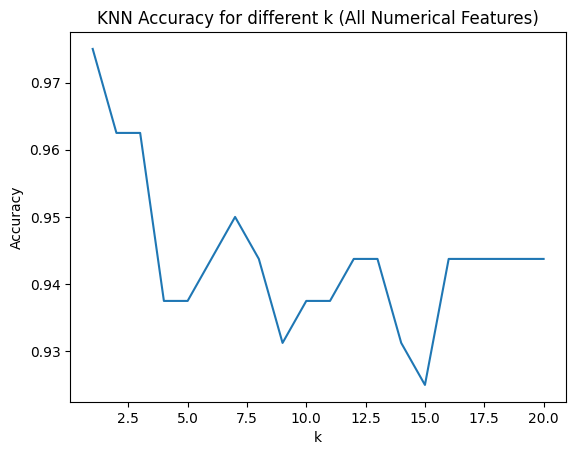

Optimal k (All Numerical Features): 1


In [30]:
# k-Nearest Neighbors (k-NN) Classification using all numerical features
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

df['Legendary'] = df['Legendary'].astype(str).str.strip().str.upper()
y = df['Legendary'].map({'TRUE': 1, 'FALSE': 0})

# Use all numerical features
numerical_features = ['HP', 'Attack', 'Defense', 'Sp. Attack', 'Sp. Defense', 'Speed']
X = df[numerical_features]
mask = ~y.isna()
X = X[mask]
y = y[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Find optimal k
accuracies = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    accuracies.append(acc)
plt.plot(range(1, 21), accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for different k (All Numerical Features)')
plt.show()

optimal_k = accuracies.index(max(accuracies)) + 1
print("Optimal k (All Numerical Features):", optimal_k)


In [31]:
# Random Forest Classifier using all numerical features
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy (All Numerical Features):", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy (All Numerical Features): 0.9625


In [32]:
# Hyperparameter Tuning with Grid Search (reduced param grid, aiming for better accuracy)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)
print("Best Random Forest Params (Reduced Grid):", rf_grid.best_params_)
y_pred_rf_tuned = rf_grid.predict(X_test)
print("Tuned Random Forest Accuracy (Reduced Grid):", accuracy_score(y_test, y_pred_rf_tuned))

Best Random Forest Params (Reduced Grid): {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Random Forest Accuracy (Reduced Grid): 0.9625


In [33]:
# Confusion Matrices for Model Comparison (all numerical features)
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Confusion Matrix (All Numerical Features):\n", confusion_matrix(y_test, y_pred_knn))
print("Random Forest Confusion Matrix (All Numerical Features):\n", confusion_matrix(y_test, y_pred_rf))
print("Tuned Random Forest Confusion Matrix (All Numerical Features):\n", confusion_matrix(y_test, y_pred_rf_tuned))


KNN Confusion Matrix (All Numerical Features):
 [[146   4]
 [  0  10]]
Random Forest Confusion Matrix (All Numerical Features):
 [[148   2]
 [  4   6]]
Tuned Random Forest Confusion Matrix (All Numerical Features):
 [[148   2]
 [  4   6]]


In [34]:
# Evaluation Metrics (all numerical features)
from sklearn.metrics import classification_report

print("\nKNN Classification Report (All Numerical Features):\n", classification_report(y_test, y_pred_knn))
print("Random Forest Classification Report (All Numerical Features):\n", classification_report(y_test, y_pred_rf))
print("Tuned Random Forest Classification Report (All Numerical Features):\n", classification_report(y_test, y_pred_rf_tuned))


KNN Classification Report (All Numerical Features):
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       150
           1       0.71      1.00      0.83        10

    accuracy                           0.97       160
   macro avg       0.86      0.99      0.91       160
weighted avg       0.98      0.97      0.98       160

Random Forest Classification Report (All Numerical Features):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       150
           1       0.75      0.60      0.67        10

    accuracy                           0.96       160
   macro avg       0.86      0.79      0.82       160
weighted avg       0.96      0.96      0.96       160

Tuned Random Forest Classification Report (All Numerical Features):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       150
           1       0.75      0.60      0.67        